# Source of Data Sets

#### https://www.abs.gov.au/statistics/industry/retail-and-wholesale-trade/retail-trade-australia/latest-release#total-retail-turnover

# Guide Packages

In [ ]:
!pip install numpy pandas matplotlib seaborn --quiet
import os
import math
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from sklearn import metrics
from datetime import datetime
from google.colab import drive
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

!pip install pingouin
import pingouin as pg

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve

# Input Dataset


In [ ]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/task-in/Task5/Australia")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Australia/850103 (3).xls - Data1.csv')

In [ ]:
Data.rename(columns={'Unnamed: 0':'Month'},inplace = True)

In [ ]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 28 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Month                                                             483 non-null    object
 1   Turnover ;  New South Wales ;  Total (Industry) ;                 483 non-null    object
 2   Turnover ;  Victoria ;  Total (Industry) ;                        483 non-null    object
 3   Turnover ;  Queensland ;  Total (Industry) ;                      483 non-null    object
 4   Turnover ;  South Australia ;  Total (Industry) ;                 483 non-null    object
 5   Turnover ;  Western Australia ;  Total (Industry) ;               483 non-null    object
 6   Turnover ;  Tasmania ;  Total (Industry) ;                        483 non-null    object
 7   Turnover ;  Northern Territory ;  Total (Ind

In [ ]:
Data.head(15)

,Month,Turnover ; New South Wales ; Total (Industry) ;,Turnover ; Victoria ; Total (Industry) ;,Turnover ; Queensland ; Total (Industry) ;,Turnover ; South Australia ; Total (Industry) ;,Turnover ; Western Australia ; Total (Industry) ;,Turnover ; Tasmania ; Total (Industry) ;,Turnover ; Northern Territory ; Total (Industry) ;,Turnover ; Australian Capital Territory ; Total (Industry) ;,Turnover ; Total (State) ; Total (Industry) ;,Turnover ; New South Wales ; Total (Industry) ;.1,Turnover ; Victoria ; Total (Industry) ;.1,Turnover ; Queensland ; Total (Industry) ;.1,Turnover ; South Australia ; Total (Industry) ;.1,Turnover ; Western Australia ; Total (Industry) ;.1,Turnover ; Tasmania ; Total (Industry) ;.1,Turnover ; Northern Territory ; Total (Industry) ;.1,Turnover ; Australian Capital Territory ; Total (Industry) ;.1,Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; New South Wales ; Total (Industry) ;.2,Turnover ; Victoria ; Total (Industry) ;.2,Turnover ; Queensland ; Total (Industry) ;.2,Turnover ; South Australia ; Total (Industry) ;.2,Turnover ; Western Australia ; Total (Industry) ;.2,Turnover ; Tasmania ; Total (Industry) ;.2,Turnover ; Northern Territory ; Total (Industry) ;.2,Turnover ; Australian Capital Territory ; Total (Industry) ;.2,Turnover ; Total (State) ; Total (Industry) ;.2
0,Unit,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend
2,Data Type,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Series Start,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982
6,Series End,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021
7,No. Obs,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474
8,Series ID,A3348645F,A3348708C,A3348771V,A3348834T,A3348897A,A3348960F,A3349023F,A3349086R,A3348582J,A3348648L,A3348711T,A3348774A,A3348837X,A3348900C,A3348963L,A3349026L,A3349089W,A3348585R,A3348651A,A3348714X,A3348777J,A3348840L,A3348903K,A3348966V,A3349029V,A3349092K,A3348588W
9,4月-1982,1250.2,916.2,486.3,279.4,298.3,79.9,NaN,57.1,3396.4,1310.8,932.0,508.6,284.3,313.0,81.6,NaN,57.8,3518.7,1310.2,933.2,511.7,284.0,315.3,81.3,NaN,57.2,3523.4


In [ ]:
print(Data.isnull().sum())

Month                                                                0
Turnover ;  New South Wales ;  Total (Industry) ;                    0
Turnover ;  Victoria ;  Total (Industry) ;                           0
Turnover ;  Queensland ;  Total (Industry) ;                         0
Turnover ;  South Australia ;  Total (Industry) ;                    0
Turnover ;  Western Australia ;  Total (Industry) ;                  0
Turnover ;  Tasmania ;  Total (Industry) ;                           0
Turnover ;  Northern Territory ;  Total (Industry) ;                72
Turnover ;  Australian Capital Territory ;  Total (Industry) ;       0
Turnover ;  Total (State) ;  Total (Industry) ;                      0
Turnover ;  New South Wales ;  Total (Industry) ;.1                  0
Turnover ;  Victoria ;  Total (Industry) ;.1                         0
Turnover ;  Queensland ;  Total (Industry) ;.1                       0
Turnover ;  South Australia ;  Total (Industry) ;.1                  0
Turnov

In [ ]:
print("Data.shape", Data.shape)

Data.shape (483, 28)


# Data Pre-processing

In [ ]:
Data[:10]

,Month,Turnover ; New South Wales ; Total (Industry) ;,Turnover ; Victoria ; Total (Industry) ;,Turnover ; Queensland ; Total (Industry) ;,Turnover ; South Australia ; Total (Industry) ;,Turnover ; Western Australia ; Total (Industry) ;,Turnover ; Tasmania ; Total (Industry) ;,Turnover ; Northern Territory ; Total (Industry) ;,Turnover ; Australian Capital Territory ; Total (Industry) ;,Turnover ; Total (State) ; Total (Industry) ;,Turnover ; New South Wales ; Total (Industry) ;.1,Turnover ; Victoria ; Total (Industry) ;.1,Turnover ; Queensland ; Total (Industry) ;.1,Turnover ; South Australia ; Total (Industry) ;.1,Turnover ; Western Australia ; Total (Industry) ;.1,Turnover ; Tasmania ; Total (Industry) ;.1,Turnover ; Northern Territory ; Total (Industry) ;.1,Turnover ; Australian Capital Territory ; Total (Industry) ;.1,Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; New South Wales ; Total (Industry) ;.2,Turnover ; Victoria ; Total (Industry) ;.2,Turnover ; Queensland ; Total (Industry) ;.2,Turnover ; South Australia ; Total (Industry) ;.2,Turnover ; Western Australia ; Total (Industry) ;.2,Turnover ; Tasmania ; Total (Industry) ;.2,Turnover ; Northern Territory ; Total (Industry) ;.2,Turnover ; Australian Capital Territory ; Total (Industry) ;.2,Turnover ; Total (State) ; Total (Industry) ;.2
0,Unit,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend
2,Data Type,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Series Start,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982
6,Series End,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021
7,No. Obs,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474
8,Series ID,A3348645F,A3348708C,A3348771V,A3348834T,A3348897A,A3348960F,A3349023F,A3349086R,A3348582J,A3348648L,A3348711T,A3348774A,A3348837X,A3348900C,A3348963L,A3349026L,A3349089W,A3348585R,A3348651A,A3348714X,A3348777J,A3348840L,A3348903K,A3348966V,A3349029V,A3349092K,A3348588W
9,4月-1982,1250.2,916.2,486.3,279.4,298.3,79.9,NaN,57.1,3396.4,1310.8,932.0,508.6,284.3,313.0,81.6,NaN,57.8,3518.7,1310.2,933.2,511.7,284.0,315.3,81.3,NaN,57.2,3523.4


In [ ]:
Data.values.T

array([['Unit', 'Series Type', 'Data Type', ..., '7月-2021', '8月-2021',
        '9月-2021'],
       ['$ Millions', 'Original', 'FLOW', ..., '8555.7', '8215.9',
        '8539.9'],
       ['$ Millions', 'Original', 'FLOW', ..., '7380.2', '7122.4',
        '7022.4'],
       ...,
       ['$ Millions', 'Trend', 'FLOW', ..., nan, nan, nan],
       ['$ Millions', 'Trend', 'FLOW', ..., nan, nan, nan],
       ['$ Millions', 'Trend', 'FLOW', ..., nan, nan, nan]], dtype=object)

In [ ]:
index_colums = Data.columns
index_row = Data.index

In [ ]:
Data_T = pd.DataFrame(Data.values.T)
Data_T.index = index_colums
Data_T.colums = Data['Month']
Data_T[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482
Month,Unit,Series Type,Data Type,Frequency,Collection Month,Series Start,Series End,No. Obs,Series ID,4月-1982,5月-1982,6月-1982,7月-1982,8月-1982,9月-1982,10月-1982,11月-1982,12月-1982,1月-1983,2月-1983,3月-1983,4月-1983,5月-1983,6月-1983,7月-1983,8月-1983,9月-1983,10月-1983,11月-1983,12月-1983,1月-1984,2月-1984,3月-1984,4月-1984,5月-1984,6月-1984,7月-1984,8月-1984,9月-1984,10月-1984,...,6月-2018,7月-2018,8月-2018,9月-2018,10月-2018,11月-2018,12月-2018,1月-2019,2月-2019,3月-2019,4月-2019,5月-2019,6月-2019,7月-2019,8月-2019,9月-2019,10月-2019,11月-2019,12月-2019,1月-2020,2月-2020,3月-2020,4月-2020,5月-2020,6月-2020,7月-2020,8月-2020,9月-2020,10月-2020,11月-2020,12月-2020,1月-2021,2月-2021,3月-2021,4月-2021,5月-2021,6月-2021,7月-2021,8月-2021,9月-2021
Turnover ; New South Wales ; Total (Industry) ;,$ Millions,Original,FLOW,Month,1,4月-1982,9月-2021,474,A3348645F,1250.2,1300.0,1234.2,1265.0,1217.6,1244.9,1264.2,1372.6,1888.3,1214.5,1240.6,1375.7,1344.2,1379.9,1325.8,1328.1,1366.3,1370.8,1412.3,1541.6,2119.6,1299.1,1348.1,1433.6,1352.8,1519.4,1376.9,1421.9,1462.9,1397.5,1536.0,...,8354.4,8304.6,8474.8,8387.7,8747.3,9245.0,11085.5,8651.0,7717.4,8496.4,8247.9,8503.7,8371.3,8349.8,8542.8,8451.1,8930.2,9424.2,11156.1,8630.8,7946.2,9057.6,7349.1,8787.1,8968.6,9536.2,9278.4,9336.0,9910.5,10448.2,12160.5,9397.7,8477.6,9470.1,9256.2,9611.1,9342.8,8555.7,8215.9,8539.9
Turnover ; Victoria ; Total (Industry) ;,$ Millions,Original,FLOW,Month,1,4月-1982,9月-2021,474,A3348708C,916.2,931.2,887.0,921.3,883.2,917.9,983.3,1065.2,1427.3,920.3,921.7,1049.2,994.9,990.4,950.0,971.0,1015.5,1019.2,1053.0,1136.8,1543.3,1020.7,1024.5,1117.4,1049.3,1156.7,1047.0,1048.3,1077.2,1017.4,1126.6,...,6704.9,6657.5,6793.4,6757.1,7169.5,7511.7,9118.5,6926.8,6292.9,7035.3,6825.2,7014.1,6906.9,6886.1,7046.9,6890.5,7304.3,7716.0,9376.9,7121.9,6696.7,7653.1,5946.7,7054.6,7237.1,7130.8,6236.5,6212.8,6925.3,8725.1,10012.4,7636.5,6701.3,7800.0,7539.6,7640.1,7257.9,7380.2,7122.4,7022.4
Turnover ; Queensland ; Total (Industry) ;,$ Millions,Original,FLOW,Month,1,4月-1982,9月-2021,474,A3348771V,486.3,492.8,494.1,515.6,501.4,517.7,504.2,536.0,715.9,502.4,470.0,535.7,509.0,527.5,524.2,534.8,551.0,553.9,545.1,593.3,772.2,548.9,513.7,555.7,532.2,593.6,560.7,592.4,620.3,591.7,627.8,...,5065.5,5273.3,5300.0,5226.6,5470.5,5630.1,6729.8,5358.7,4753.2,5279.2,5191.3,5329.5,5298.6,5507.2,5585.6,5423.1,5712.7,5939.8,7043.9,5632.4,5174.5,5943.5,4938.4,5881.2,5909.0,6470.8,6298.6,6173.4,6430.6,6731.1,8042.5,6299.4,5594.3,6201.9,5959.3,6204.8,6161.3,6383.3,6225.1,6500.5
Turnover ; South Australia ; Total (Industry) ;,$ Millions,Original,FLOW,Month,1,4月-1982,9月-2021,474,A3348834T,279.4,288.0,277.2,296.1,288.4,293.0,307.9,332.1,440.9,295.9,284.1,340.5,326.0,341.1,335.0,342.3,356.4,349.7,332.8,363.9,480.0,320.5,320.2,346.8,325.6,367.9,339.7,346.9,351.0,334.2,369.2,...,1687.2,1696.2,1719.0,1703.0,1802.2,1861.6,2211.4,1746.2,1570.3,1759.9,1713.6,1778.2,1708.6,1725.6,1754.6,1724.5,1831.2,1912.6,2239.6,1765.5,1643.7,1922.5,1605.5,1912.7,1885.2,1983.2,1931.8,1890.3,2019.5,2034.3,2469.4,1925.7,1728.6,1940.4,1848.9,1906.3,1885.7,1862.6,1952.3,1975.3


In [ ]:
Columns = []
for i in range(len(Data['Month'])):
  Columns.append(Data['Month'][i])
  if Data['Month'][i] == '4月-1982':
    print(i)
Columns = Columns[9:]
Columns[:5]

9


['4月-1982', '5月-1982', '6月-1982', '7月-1982', '8月-1982']

In [ ]:
Columns.insert(0,'Series Type')
Columns[:5]

['Series Type', '4月-1982', '5月-1982', '6月-1982', '7月-1982']

In [ ]:
for i in range(3,9):
  Data_T.drop([i],axis=1,inplace=True)
Data_T.drop([0],axis=1,inplace=True)
Data_T.drop([2],axis=1,inplace=True)

In [ ]:
len(Data_T.columns)

475

In [ ]:
Data_T.columns = Columns
Data_T[:5]

,Series Type,4月-1982,5月-1982,6月-1982,7月-1982,8月-1982,9月-1982,10月-1982,11月-1982,12月-1982,1月-1983,2月-1983,3月-1983,4月-1983,5月-1983,6月-1983,7月-1983,8月-1983,9月-1983,10月-1983,11月-1983,12月-1983,1月-1984,2月-1984,3月-1984,4月-1984,5月-1984,6月-1984,7月-1984,8月-1984,9月-1984,10月-1984,11月-1984,12月-1984,1月-1985,2月-1985,3月-1985,4月-1985,5月-1985,6月-1985,...,6月-2018,7月-2018,8月-2018,9月-2018,10月-2018,11月-2018,12月-2018,1月-2019,2月-2019,3月-2019,4月-2019,5月-2019,6月-2019,7月-2019,8月-2019,9月-2019,10月-2019,11月-2019,12月-2019,1月-2020,2月-2020,3月-2020,4月-2020,5月-2020,6月-2020,7月-2020,8月-2020,9月-2020,10月-2020,11月-2020,12月-2020,1月-2021,2月-2021,3月-2021,4月-2021,5月-2021,6月-2021,7月-2021,8月-2021,9月-2021
Month,Series Type,4月-1982,5月-1982,6月-1982,7月-1982,8月-1982,9月-1982,10月-1982,11月-1982,12月-1982,1月-1983,2月-1983,3月-1983,4月-1983,5月-1983,6月-1983,7月-1983,8月-1983,9月-1983,10月-1983,11月-1983,12月-1983,1月-1984,2月-1984,3月-1984,4月-1984,5月-1984,6月-1984,7月-1984,8月-1984,9月-1984,10月-1984,11月-1984,12月-1984,1月-1985,2月-1985,3月-1985,4月-1985,5月-1985,6月-1985,...,6月-2018,7月-2018,8月-2018,9月-2018,10月-2018,11月-2018,12月-2018,1月-2019,2月-2019,3月-2019,4月-2019,5月-2019,6月-2019,7月-2019,8月-2019,9月-2019,10月-2019,11月-2019,12月-2019,1月-2020,2月-2020,3月-2020,4月-2020,5月-2020,6月-2020,7月-2020,8月-2020,9月-2020,10月-2020,11月-2020,12月-2020,1月-2021,2月-2021,3月-2021,4月-2021,5月-2021,6月-2021,7月-2021,8月-2021,9月-2021
Turnover ; New South Wales ; Total (Industry) ;,Original,1250.2,1300.0,1234.2,1265.0,1217.6,1244.9,1264.2,1372.6,1888.3,1214.5,1240.6,1375.7,1344.2,1379.9,1325.8,1328.1,1366.3,1370.8,1412.3,1541.6,2119.6,1299.1,1348.1,1433.6,1352.8,1519.4,1376.9,1421.9,1462.9,1397.5,1536.0,1640.7,2174.7,1471.3,1366.3,1488.3,1521.9,1716.5,1507.1,...,8354.4,8304.6,8474.8,8387.7,8747.3,9245.0,11085.5,8651.0,7717.4,8496.4,8247.9,8503.7,8371.3,8349.8,8542.8,8451.1,8930.2,9424.2,11156.1,8630.8,7946.2,9057.6,7349.1,8787.1,8968.6,9536.2,9278.4,9336.0,9910.5,10448.2,12160.5,9397.7,8477.6,9470.1,9256.2,9611.1,9342.8,8555.7,8215.9,8539.9
Turnover ; Victoria ; Total (Industry) ;,Original,916.2,931.2,887.0,921.3,883.2,917.9,983.3,1065.2,1427.3,920.3,921.7,1049.2,994.9,990.4,950.0,971.0,1015.5,1019.2,1053.0,1136.8,1543.3,1020.7,1024.5,1117.4,1049.3,1156.7,1047.0,1048.3,1077.2,1017.4,1126.6,1219.2,1532.3,1087.6,1055.7,1130.5,1131.4,1259.2,1102.2,...,6704.9,6657.5,6793.4,6757.1,7169.5,7511.7,9118.5,6926.8,6292.9,7035.3,6825.2,7014.1,6906.9,6886.1,7046.9,6890.5,7304.3,7716.0,9376.9,7121.9,6696.7,7653.1,5946.7,7054.6,7237.1,7130.8,6236.5,6212.8,6925.3,8725.1,10012.4,7636.5,6701.3,7800.0,7539.6,7640.1,7257.9,7380.2,7122.4,7022.4
Turnover ; Queensland ; Total (Industry) ;,Original,486.3,492.8,494.1,515.6,501.4,517.7,504.2,536.0,715.9,502.4,470.0,535.7,509.0,527.5,524.2,534.8,551.0,553.9,545.1,593.3,772.2,548.9,513.7,555.7,532.2,593.6,560.7,592.4,620.3,591.7,627.8,658.8,833.8,627.2,548.7,616.0,606.4,675.3,613.8,...,5065.5,5273.3,5300.0,5226.6,5470.5,5630.1,6729.8,5358.7,4753.2,5279.2,5191.3,5329.5,5298.6,5507.2,5585.6,5423.1,5712.7,5939.8,7043.9,5632.4,5174.5,5943.5,4938.4,5881.2,5909.0,6470.8,6298.6,6173.4,6430.6,6731.1,8042.5,6299.4,5594.3,6201.9,5959.3,6204.8,6161.3,6383.3,6225.1,6500.5
Turnover ; South Australia ; Total (Industry) ;,Original,279.4,288.0,277.2,296.1,288.4,293.0,307.9,332.1,440.9,295.9,284.1,340.5,326.0,341.1,335.0,342.3,356.4,349.7,332.8,363.9,480.0,320.5,320.2,346.8,325.6,367.9,339.7,346.9,351.0,334.2,369.2,394.2,480.3,357.9,332.9,366.1,366.7,408.4,368.5,...,1687.2,1696.2,1719.0,1703.0,1802.2,1861.6,2211.4,1746.2,1570.3,1759.9,1713.6,1778.2,1708.6,1725.6,1754.6,1724.5,1831.2,1912.6,2239.6,1765.5,1643.7,1922.5,1605.5,1912.7,1885.2,1983.2,1931.8,1890.3,2019.5,2034.3,2469.4,1925.7,1728.6,1940.4,1848.9,1906.3,1885.7,1862.6,1952.3,1975.3


In [ ]:
Data_T.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
Data_T = Data_T.dropna()  

In [ ]:
Data_T.isnull().sum()

Series Type    0
4月-1982        0
5月-1982        0
6月-1982        0
7月-1982        0
              ..
5月-2021        0
6月-2021        0
7月-2021        0
8月-2021        0
9月-2021        0
Length: 475, dtype: int64

#  Model

In [ ]:
Data_T.drop(['Month'],axis=0,inplace=True)

In [ ]:
y = Data_T[Columns[-1]]

In [ ]:
Data_T.drop([Columns[-1]],axis=1,inplace=True)

In [ ]:
Data_T['Series Type'].unique()
for i in range(len(Data_T['Series Type'])):
  if Data_T['Series Type'][i] == 'Original':
    Data_T['Series Type'][i] = 0
  else:
    Data_T['Series Type'][i] = 1
# Data_T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data_T, y, test_size=0.3)

In [ ]:
rf = RandomForestRegressor(random_state=42)

rf_model = rf.fit(X_train, y_train)

preds_train_RFR = rf_model.predict(X_train)
preds_test_RFR = rf_model.predict(X_test)


print('Mean R2 for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))

print('Mean R2 for Test is  : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))


Mean R2 for Train is :  2309.067213264361
Mean R2 for Test is  :  3073.344801500537


In [ ]:
train_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)
print(train_score,test_score)

0.9099503104775104 0.919234369532018


In [ ]:
#%%time
start_time = time.time()

rf_features = RandomForestRegressor() 
rf_features.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.18561601638793945 seconds ---


In [ ]:
importance_df = pd.DataFrame({
                            'feature': X_train.columns,
                            'importance': rf_model.feature_importances_
                             }).sort_values('importance', ascending=False)


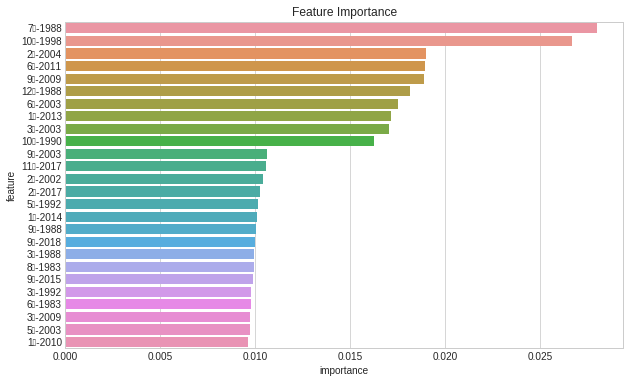

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(26), x='importance', y='feature');